----------------------------
# `PySAL` logo tutorial/palette examples
#### James Gaboardi, 02/2020 <jgaboardi@gmail.com>

In [1]:
import copy
import logo
import matplotlib
import numpy
import matplotlib.pyplot as plt
import matplotlib.image as img

%matplotlib inline
%load_ext watermark
%load_ext autoreload
%watermark
%autoreload 2

2020-04-04T15:39:46-04:00

CPython 3.7.3
IPython 7.10.2

compiler   : Clang 9.0.0 (tags/RELEASE_900/final)
system     : Darwin
release    : 19.4.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [2]:
%watermark -iv

logo       0.0.2
matplotlib 3.1.2
numpy      1.17.3



In [3]:
print(dir(logo))

['BLACK', 'BULLETS', 'CHILD_NODES', 'DARKGRAY', 'GRANDCHILD_NODES', 'GREEK', 'NO_TEXT', 'TRANSPARENT', 'WHITE', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'build_tex_file', 'canon2020_theme_dark', 'canon2020_theme_light', 'canon2020_theme_transparent', 'cb_qual_Paired_n7_theme_dark', 'cb_qual_Paired_n7_theme_light', 'cb_qual_Paired_n7_theme_transparent', 'cb_qual_Set1_n7_theme_dark', 'cb_qual_Set1_n7_theme_light', 'cb_qual_Set1_n7_theme_transparent', 'create_favicon', 'create_logo', 'create_pysal_logo', 'defined_latex_colors', 'latex_color_codes', 'latex_color_names', 'predefined', 'psnav_1line', 'psnav_2line', 'spaghetti_theme_transparent', 'spgh_long', 'traditional_theme_dark', 'traditional_theme_light', 'traditional_theme_transparent']


In [4]:
try:
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats("retina")
except ImportError:
    pass

-----------------

In [5]:
def theme_logos(names, theme_dicts=None, fcon=None, nav=None, move_to="./examples/"):
    """Helper for creating themes."""
    for idx, n in enumerate(names):
        if theme_dicts:
            theme = copy.deepcopy(theme_dicts[idx])
        else:
            theme = copy.deepcopy(getattr(logo, n))
        if move_to:
            theme["move_to"] = move_to
        if not fcon and not nav:
            logo.create_logo(n, **theme)
        else:
            theme["concept_text"] = ""
            if nav:
                theme["nav_logo"] = nav
                logo.create_logo(n, **theme)
            else:
                for fc in fcon:
                    logo.create_favicon(n, **theme)
    path = move_to if move_to else ""
    if fcon:
        names = ["%s%s" % (n,f) for n,f in zip(names,fcon)]
    ext = "png" if not fcon else "ico"
    imgs = [img.imread("%s%s.%s" % (path, n, ext)) for n in names]
    return imgs

In [6]:
def plotter(rows, cols, figsize=(12.5, 12.5)):
    """Helper for plotting themes."""
    def _plot_cols():
        for j, _img in enumerate(cols):
            if ncols == 1:
                axs[i].imshow(_img, interpolation="bilinear")
                axs[i].axis("off")
            else:
                axs[i][j].imshow(_img, interpolation="bilinear")
                axs[i][j].axis("off")
    
    ncols = len(cols)
    if type(rows) == int:
        fig, *axs = plt.subplots(rows, ncols, figsize=figsize)
        fig.subplots_adjust(hspace=0, wspace=0)
        for i in range(rows):
            _plot_cols()

--------------------------
## Creating logos

In [7]:
print(help(logo.create_logo))

Help on function create_logo in module logo.create_pysal_logo:

create_logo(fname, node_info=None, color_format=None, background_color=None, concept_color=None, text_color=None, move_to=None, nav_logo=None, concept_text='PySAL', concept_font_style='bfseries', concept_font_size='large', font='M+ 1mn', engine='lualatex', convert_tikz=',convert={outfile=\\jobname.%s}', fmat='png', clean_up=['aux', 'log', 'pdf'])
    Create the PySAL logo with TeX/TikZ by initializing and 
    appending a raw text file before saving it out as a .tex file.
    Following the .tex file creation, perform a command line call.
    
    Parameters
    ----------
    
    fname : str
        Logo file name.
    
    node_info : numpy.array
        A 7x2 array where each row represent the information for
        one child node. The first column of the array is a 2 element
        tuple in the form ("color name", "r, g, b"), where "r, g, b"
        are the specific RBG color values. The second column is the 
       

### Pre-defined themes
#### "Traditional" PySAL themes
**Inspired by Rey and Anselin (2007)**

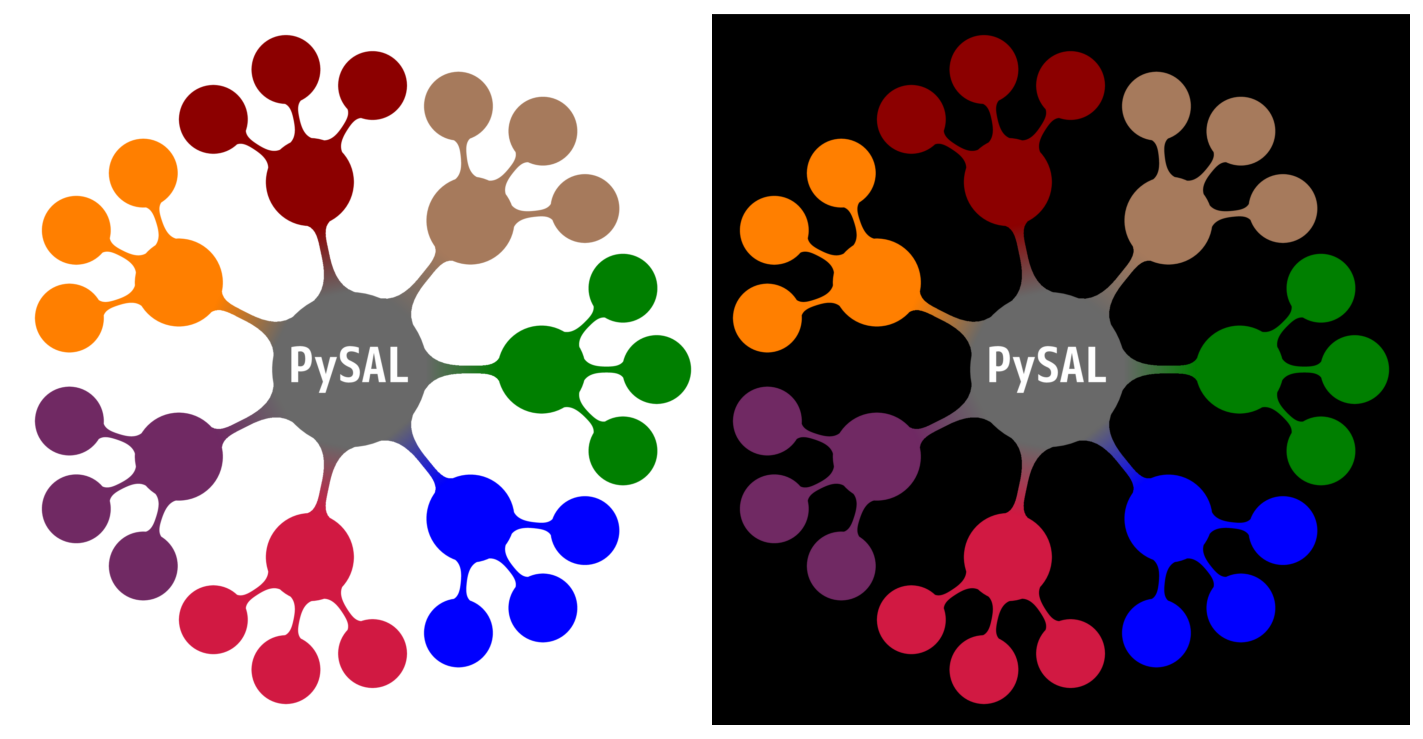

In [8]:
themes = ["traditional_theme_light", "traditional_theme_dark"]
images = theme_logos(themes)
plotter(1, images)

**PySAL2020 colors (pending final decisions, will likely change, see [here](https://github.com/pysal/logo/blob/5616bf4d4fd45f9d08f16ddb87af306411001c34/logo/predefined.py#L173))**

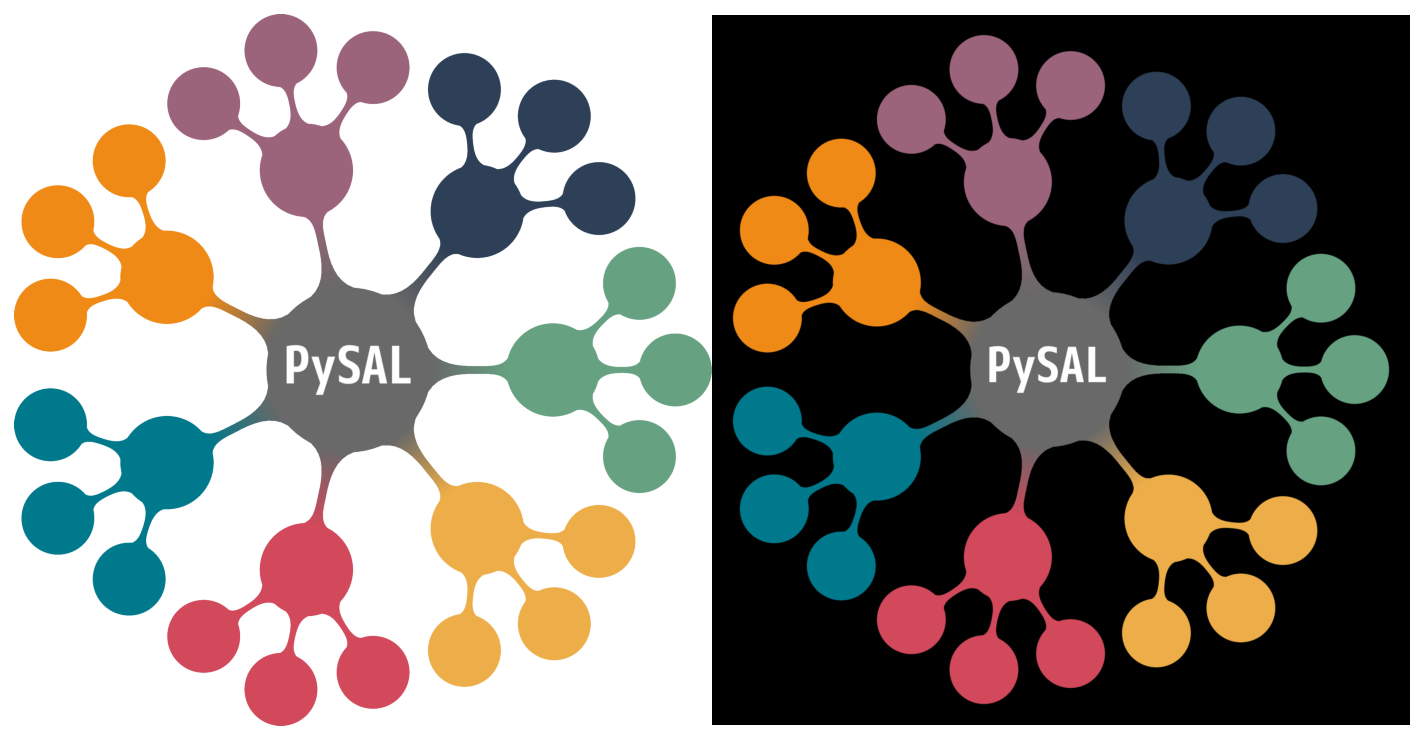

In [9]:
themes = ["canon2020_theme_transparent", "canon2020_theme_dark"]
images = theme_logos(themes)
plotter(1, images)

In [10]:
# also save these out in the top directory
names = "pysal_logo", "pysal_logo_light", "pysal_logo_dark"
themes = [
    logo.canon2020_theme_transparent,
    logo.canon2020_theme_light,
    logo.canon2020_theme_dark
]
images = theme_logos(names, themes, move_to=None)

--------------------------
#### ColorBrewer2 themes
**Qualitative, Paired, $n=7$**

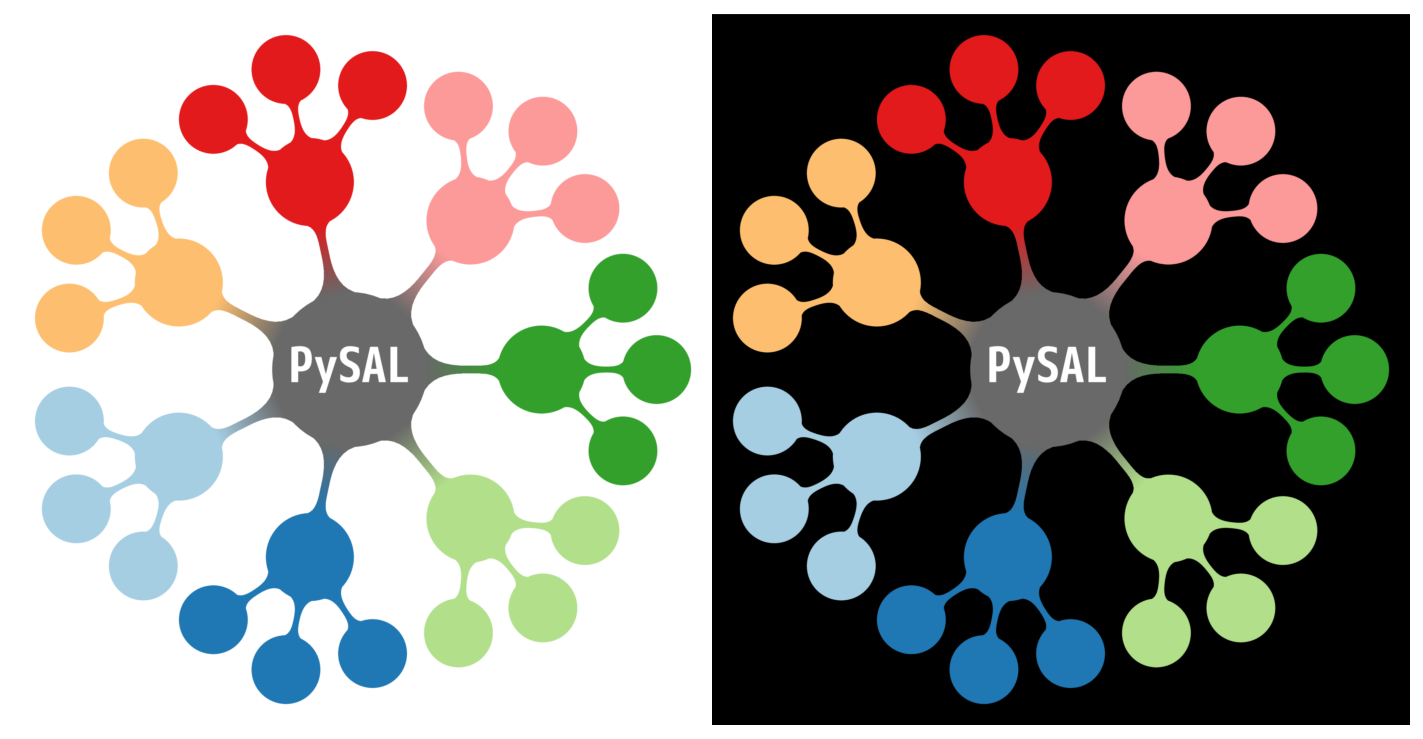

In [11]:
themes = ["cb_qual_Paired_n7_theme_light", "cb_qual_Paired_n7_theme_dark"]
images = theme_logos(themes)
plotter(1, images)

**Qualitative, Set1, $n=7$**

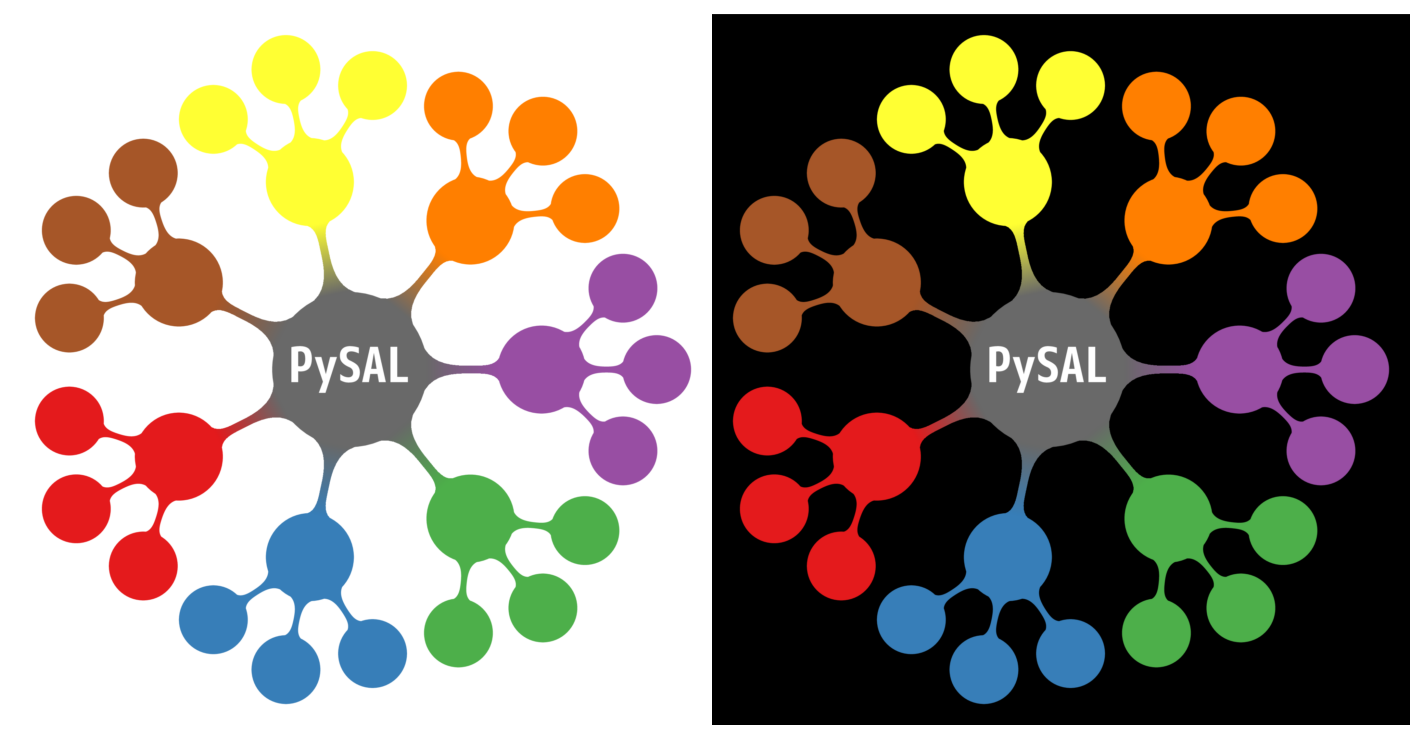

In [12]:
themes = ["cb_qual_Set1_n7_theme_light", "cb_qual_Set1_n7_theme_dark"]
images = theme_logos(themes)
plotter(1, images)

----------------
### Custom themes
#### Selected, named LaTeX colors

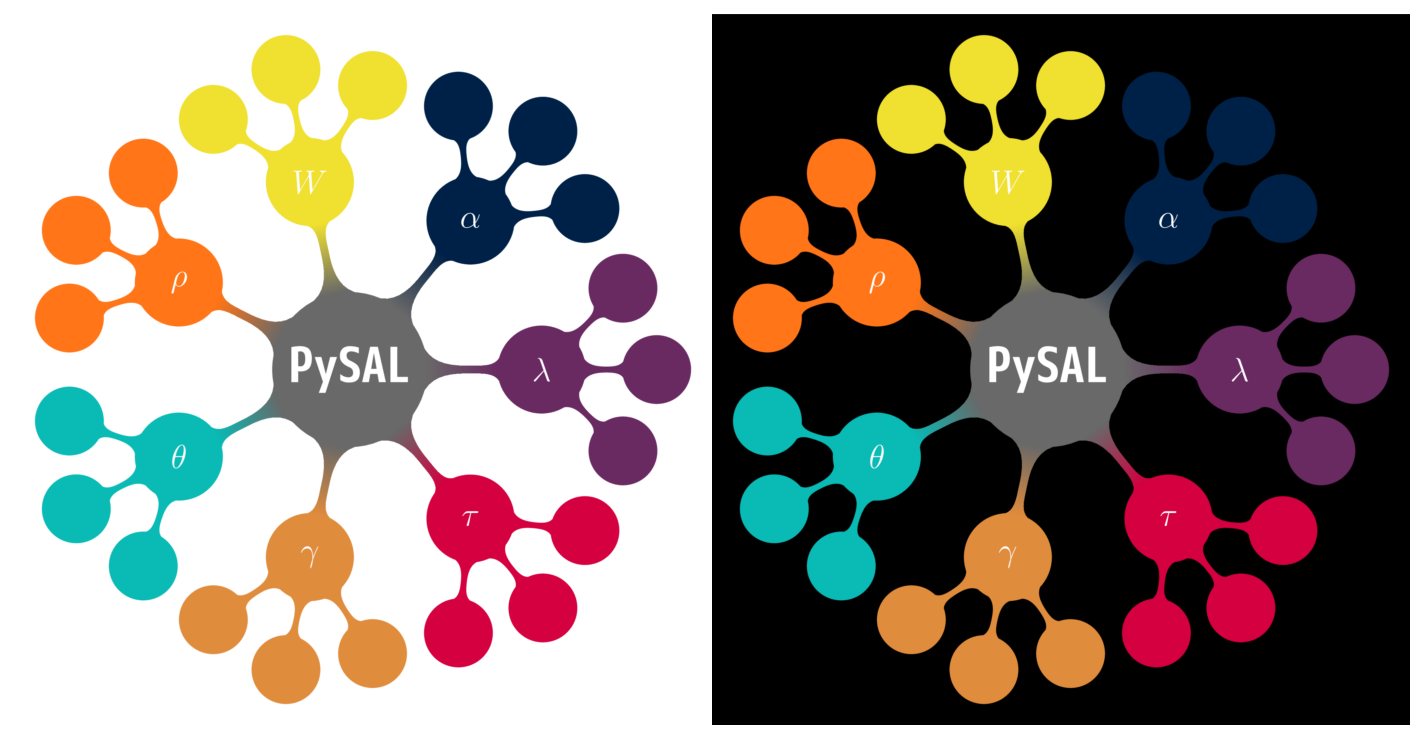

In [13]:
# choose 7 colors from logo.latex_color_names (http://latexcolor.com/)
color_format = "RGB"
colors = [
    "tiffanyblue",
    "tigerseye",
    "utahcrimson",
    "palatinatepurple",
    "oxfordblue",
    "dandelion",
    "pumpkin",
]

# isolate color codes
color_theme = {c: logo.latex_color_codes[c][color_format] for c in colors}

# try out Greek lettering in the nodes
text_theme = logo.GREEK

# combine node color and text information
node_info = numpy.array(list(zip(color_theme.items(), text_theme)))

# set non-node related colors
background_color = logo.WHITE
concept_color = logo.DARKGRAY
text_color = logo.WHITE

# set light background theme
t1 = {
    "node_info": node_info,
    "color_format": color_format,
    "background_color": background_color,
    "concept_color": concept_color,
    "text_color": text_color,
}

# set dark background theme
t2 = copy.deepcopy(t1)
background_color = logo.BLACK
t2.update({"background_color": background_color})

# plot
names = "named_latex_1", "named_latex_2"
images = theme_logos(names, theme_dicts=[t1, t2])
plotter(1, images)

#### RGB color palette

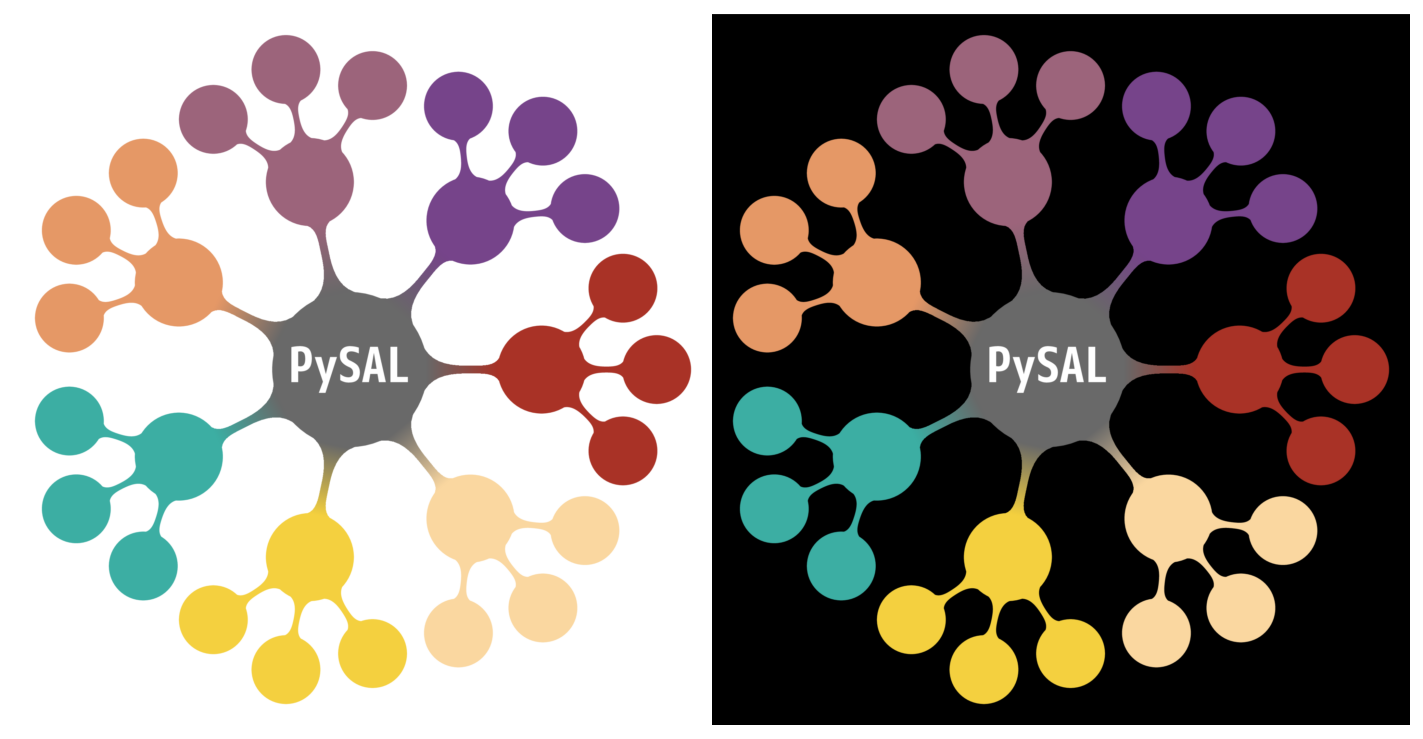

In [14]:
# set 7 colors defined by their RGB values
color_theme = {
    "60_174_163": "60, 174, 163",
    "244_208_63": "244, 208, 63",
    "250_215_160": "250, 215, 160",
    "169_50_38": "169, 50, 38",
    "118_68_138": "118, 68, 138",
    "156_100_12": "156, 100, 123",
    "229_152_102": "229, 152, 102",
}

# try out no lettering in the nodes
text_theme = logo.NO_TEXT

# combine node color and text information
node_info = numpy.array(list(zip(color_theme.items(), text_theme)))

# set non-node related colors
background_color = logo.WHITE
concept_color = logo.DARKGRAY
text_color = logo.WHITE

# set light background theme
t1 = {
    "node_info": node_info,
    "color_format": color_format,
    "background_color": background_color,
    "concept_color": concept_color,
    "text_color": text_color,
}

# set dark background theme
t2 = copy.deepcopy(t1)
background_color = logo.BLACK
t2.update({"background_color": background_color})

# plot
names = "rgb_palette_1", "rgb_palette_2"
images = theme_logos(names, theme_dicts=[t1, t2])
plotter(1, images)

--------------------------
### Random colors
#### Randomly-selected, named LaTeX colors

The colors:
 ['deeppink', 'saffron', 'yellow-green', 'brightube', 'tealblue', 'cobalt', 'tigerseye']


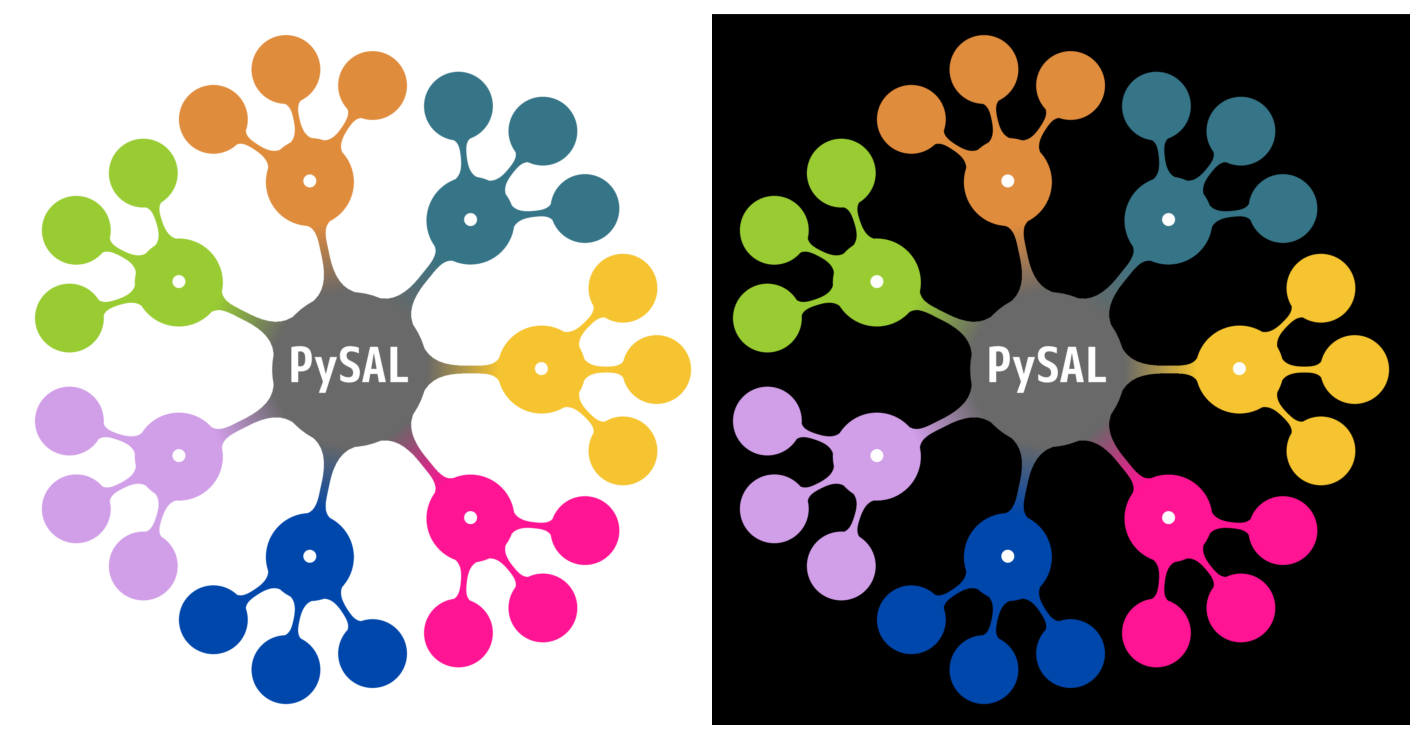

In [15]:
# Randomly choose 7 colors from logo.latex_color_names (http://latexcolor.com/)
numpy.random.seed(1984)
color_array = numpy.array(logo.latex_color_names)
n = logo.CHILD_NODES
node_colors = numpy.random.choice(color_array, size=n).tolist()
print("The colors:\n", node_colors)
color_theme = {
    k: v[color_format] for k, v in logo.latex_color_codes.items() if k in node_colors
}
# try out bullets in the nodes
text_theme = logo.BULLETS

# combine node color and text information
node_info = numpy.array(list(zip(color_theme.items(), text_theme)))

# set non-node related colors
background_color = logo.WHITE
concept_color = logo.DARKGRAY
text_color = logo.WHITE

# set light background theme
t1 = {
    "node_info": node_info,
    "color_format": color_format,
    "background_color": background_color,
    "concept_color": concept_color,
    "text_color": text_color,
}

# set dark background theme
t2 = copy.deepcopy(t1)
background_color = logo.BLACK
t2.update({"background_color": background_color})

# plot
names = "random_named_latex_1", "random_named_latex_2"
images = theme_logos(names, theme_dicts=[t1, t2])
plotter(1, images)

#### Randomly-generated, RGB color palette colors

The colors:
 ['220_111_243', '25_72_166', '8_138_174', '149_130_137', '138_240_129', '142_110_197', '39_86_54']


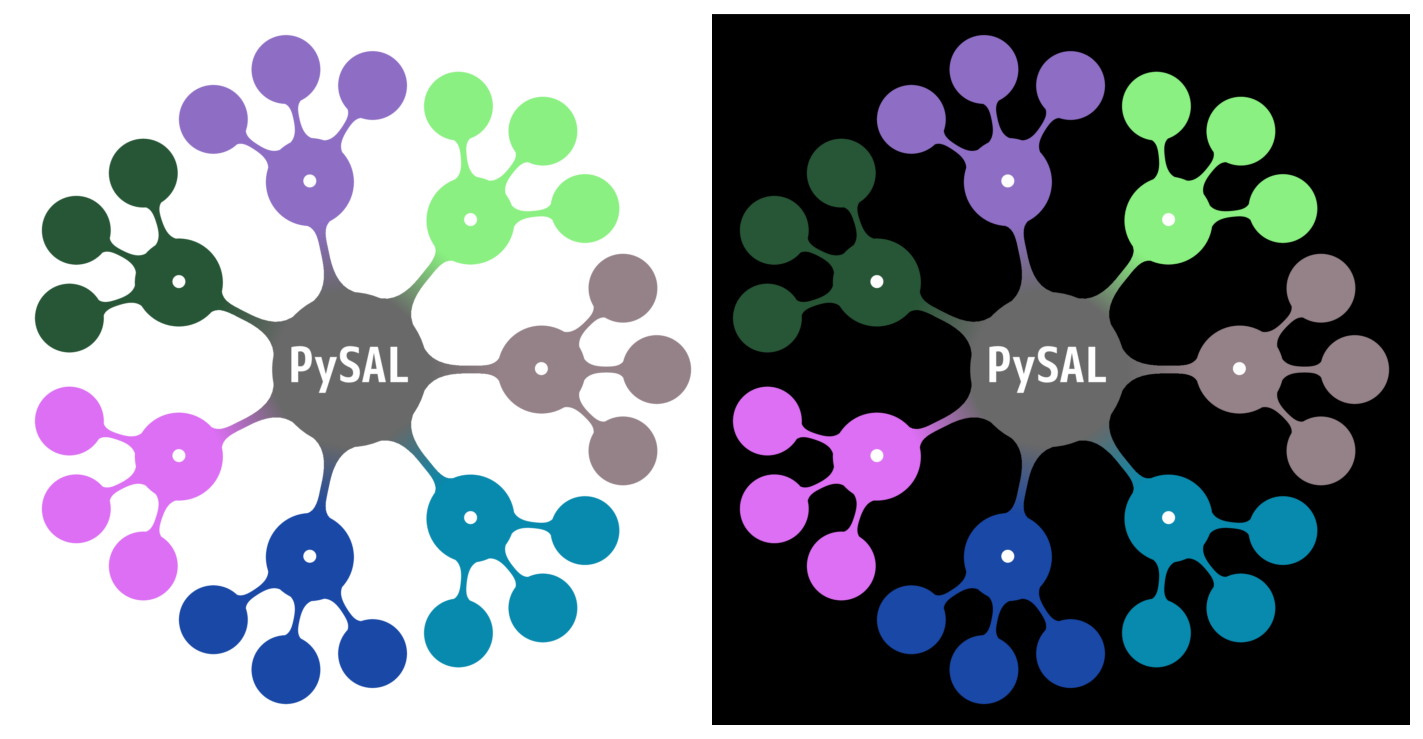

In [16]:
# Randomly generate 7 colors from RGB values.
numpy.random.seed(1984)
color_theme = {}
for i in range(logo.CHILD_NODES):
    colors = numpy.random.randint(0, 255, 3).astype(str).tolist()
    cname, ccode = "_".join(colors), ", ".join(colors)
    color_theme[cname] = ccode
print("The colors:\n", list(color_theme.keys()))

# try out bullets in the nodes
text_theme = logo.BULLETS

# combine node color and text information
node_info = numpy.array(list(zip(color_theme.items(), text_theme)))

# set non-node related colors
background_color = logo.WHITE
concept_color = logo.DARKGRAY
text_color = logo.WHITE

# set light background theme
t1 = {
    "node_info": node_info,
    "color_format": color_format,
    "background_color": background_color,
    "concept_color": concept_color,
    "text_color": text_color,
}

# set dark background theme
t2 = copy.deepcopy(t1)
background_color = logo.BLACK
t2.update({"background_color": background_color})

# plot
names = "random_rgb_palette_1", "random_rgb_palette_2"
images = theme_logos(names, theme_dicts=[t1, t2])
plotter(1, images)

----------------------
## Creating favicons
### Create the moderized PySAL favicons (`canon2020`).

In [17]:
print(help(logo.create_favicon))

Help on function create_favicon in module logo.create_pysal_logo:

create_favicon(fname, node_info=None, color_format=None, background_color=None, concept_color=None, text_color=None, move_to=None, concept_text=None, resolutions='64,48,32,16', clean_up=True)
    Create a PySAL logo favicon (.ico) file at the desired resolution.
    
    Parameters
    ----------
    
    fname : see `create_logo()`
    
    node_info : see `create_logo()`
    
    background_color : see `create_logo()`
    
    move_to : see `create_logo()`
    
    concept_text : see `create_logo()`
    
    color_format : see `create_logo()`
    
    resolutions : str (Default is '64,48,32,16')
        Auto-resize to these resolutions for the .ico files.
    
    clean_up : bool (Default is True)
        Remove all files needed to create the .ico files.
    
    Examples
    --------
    
    Create the standard PySAL favicons based on the original design found in
    Rey and Anselin (2007) at a resolution of 32x32.


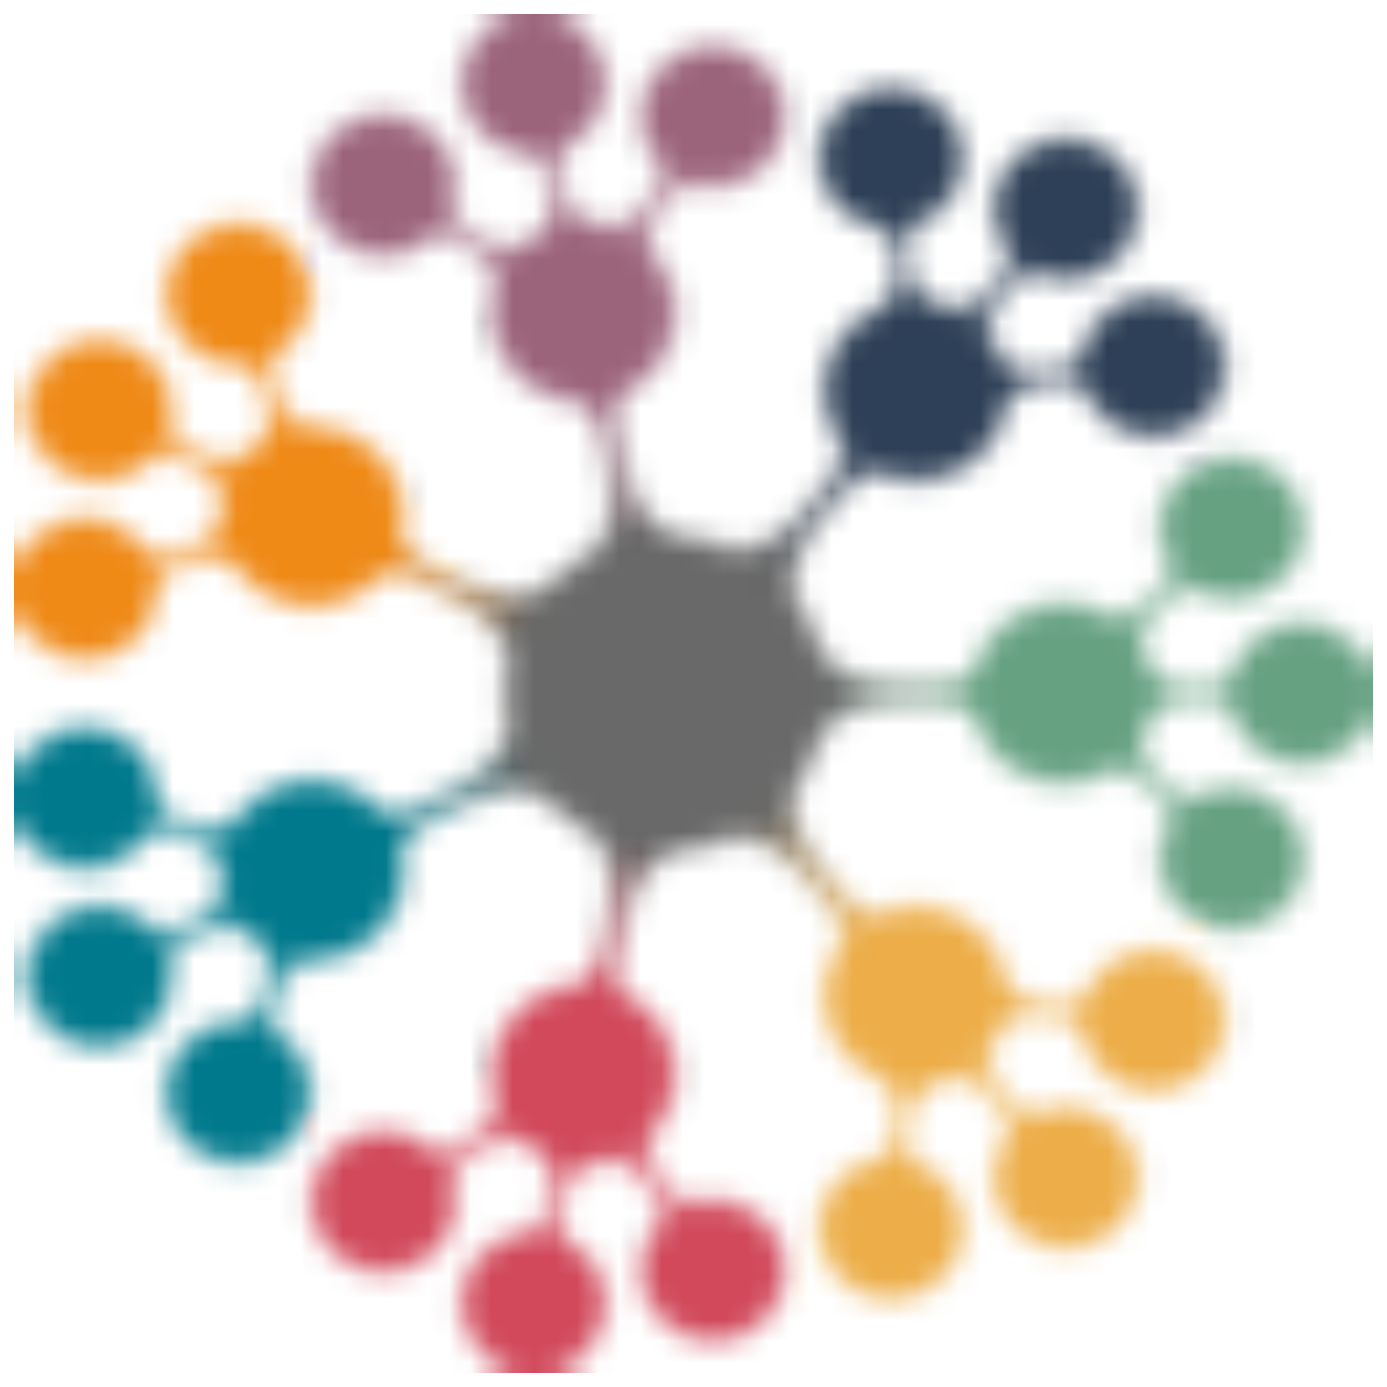

In [18]:
name = ["pysal_logo"]
theme = [logo.canon2020_theme_transparent]
fcon = ["_favicon"]
images = theme_logos(name, theme, move_to=None, fcon=fcon)
plotter(1, images)

----------------------

## Creating the navigation logo — found [here](http://pysal.org/index.html)
### Create the moderized PySAL logo (`canon2020`) with text outside the root concept, one line.

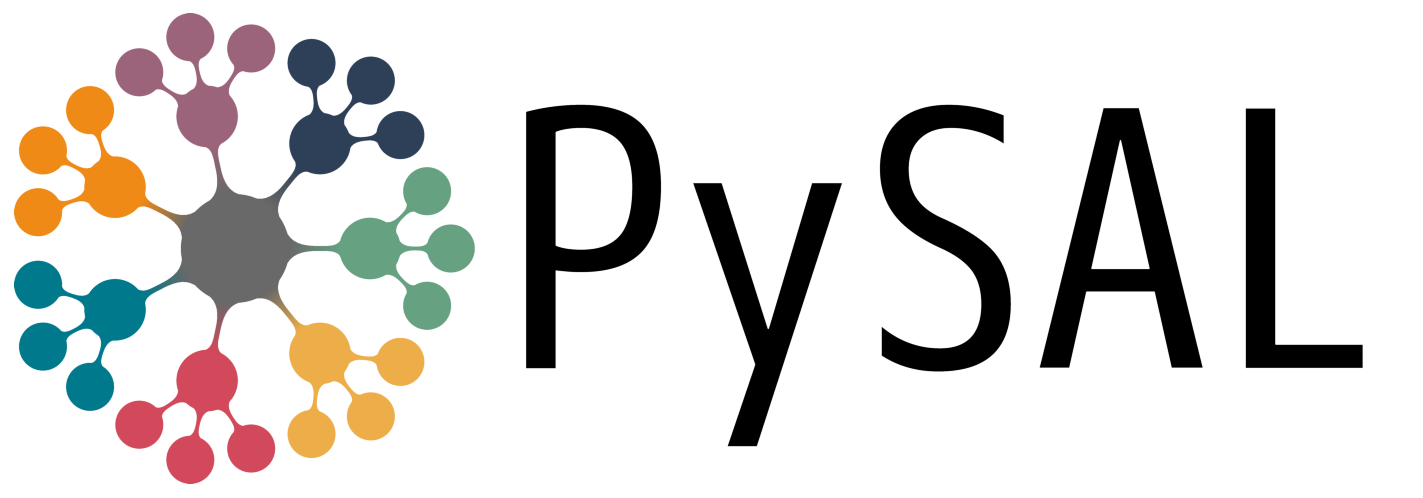

In [19]:
# also save these out in the top directory
name = ["pysal_nav_logo_1line"]
theme = [logo.canon2020_theme_transparent]
image = theme_logos(name, theme, nav=logo.psnav_1line, move_to=None)
plotter(1, image)

### Create the moderized PySAL logo (`canon2020`) with text outside the root concept, two lines.

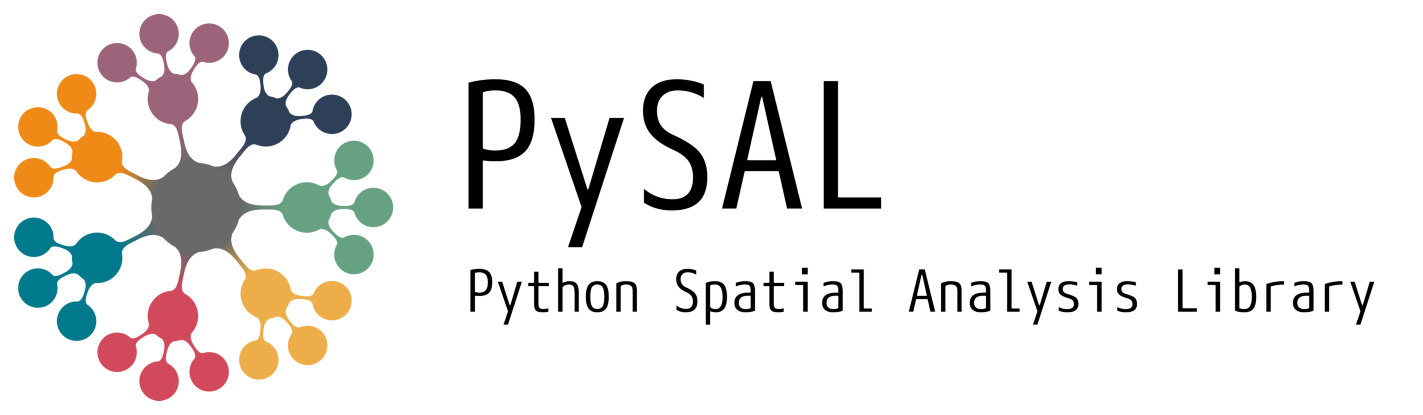

In [20]:
# also save these out in the top directory
name = ["pysal_nav_logo_2line"]
theme = [logo.canon2020_theme_transparent]
image = theme_logos(name, theme, nav=logo.psnav_2line, move_to=None)
plotter(1, image)

--------------------------------------